In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_data = pd.read_csv("./bilibili_text.csv",encoding="utf-8")
file_data.head()

,tname,title,view,like,danmaku,share,coin
0,美妆护肤,BB大王我终于在韩国以女团成员出道了！,1031558,151905,1804,2328,2328
1,MAD·AMV,“多年以后再看，才明白这是多么讽刺....”,613401,51988,325,1019,1019
2,数码,没上市的麒麟芯片！华为这颗超大核麒麟9000居然真实存在,414074,33008,921,1693,1693
3,日常,今天是我的20岁生日，即使我的妈妈已经去世，我也要带她去她想去的地方，原本我挣的钱可以给我妈...,2574523,321760,6107,662,662
4,财经商业,一口气了解全球经济形势,1030750,83103,10206,6642,6642


In [5]:
file_data.shape

(580, 7)

In [6]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tname    580 non-null    object
 1   title    580 non-null    object
 2   view     580 non-null    int64 
 3   like     580 non-null    int64 
 4   danmaku  580 non-null    int64 
 5   share    580 non-null    int64 
 6   coin     580 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 31.8+ KB


In [7]:
file_data.describe()

,view,like,danmaku,share,coin
count,5.800000e+02,580.000000,580.000000,580.000000,580.000000
mean,6.681981e+05,59191.322414,1752.829310,2453.851724,2453.851724
std,7.620917e+05,76523.208587,4823.496864,4617.962928,4617.962928
min,2.990200e+04,2621.000000,0.000000,19.000000,19.000000
25%,2.105050e+05,16658.500000,332.500000,413.000000,413.000000
50%,3.970675e+05,32424.000000,718.500000,939.000000,939.000000
75%,8.444698e+05,72058.250000,1458.750000,2321.250000,2321.250000
max,6.659837e+06,803971.000000,69312.000000,43359.000000,43359.000000


In [10]:
# 重复数据检测
file_data.duplicated()
# 删除重复数据
file_data.drop_duplicates(inplace=True)
file_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
575    False
576    False
577    False
578    False
579    False
Length: 580, dtype: bool

In [15]:
# 创建一个DF对象，该对象只有两列数据：tname和like
new_df = pd.DataFrame(data={"tname": file_data["tname"].unique(), "like": [0]*file_data['tname'].unique()})
new_df

,tname,like
0,美妆护肤,
1,MAD·AMV,
2,数码,
3,日常,
4,财经商业,
...,...,...
72,手办·模玩,
73,特摄,
74,野生技能协会,
75,运动文化,


In [16]:
# 按“tname”列将file_data分组，并统计每个分组的数量
group_area = file_data.groupby(by="tname").count()  # pandas.core.frame.DataFrame
new_df["like"] = group_area.values
new_df

,tname,like
0,美妆护肤,2
1,MAD·AMV,5
2,数码,4
3,日常,2
4,财经商业,5
...,...,...
72,手办·模玩,2
73,特摄,8
74,野生技能协会,3
75,运动文化,6


In [18]:
# 按“数量”从小到大排序
new_df.sort_values(by="like", ascending=False)

,tname,like
28,明星综合,56
14,科学科普,46
27,美食测评,43
31,乐评盘点,41
24,社科·法律·心理,37
...,...,...
61,VOCALOID·UTAU,1
60,粉丝创作,1
40,野生动物,1
42,汽车生活,1


In [21]:
like_data = file_data["tname"]
like_data

0         美妆护肤
1      MAD·AMV
2           数码
3           日常
4         财经商业
        ...   
575       影视杂谈
576         搞笑
577       影视杂谈
578     MMD·3D
579         数码
Name: tname, Length: 580, dtype: object

In [24]:
def all_tname(arr):
    key = np.unique(arr)
    result = {}
    for k in key:
        mask = (arr == k)
        arr_new = arr[mask]
        v = arr_new.size
        result[k] = v
    return result


In [28]:
tname_info = all_tname(like_data)
tname_info

{'GMV': 2,
 'MAD·AMV': 5,
 'MMD·3D': 4,
 'VOCALOID·UTAU': 2,
 '三农': 5,
 '乐评盘点': 5,
 '人力VOCALOID': 2,
 '人文历史': 14,
 '仿妆cos': 5,
 '健身': 5,
 '出行': 14,
 '动漫杂谈': 12,
 '动物二创': 2,
 '动物综合': 1,
 '单机游戏': 46,
 '原创音乐': 3,
 '喵星人': 9,
 '国产原创相关': 4,
 '国风舞蹈': 2,
 '娱乐杂谈': 2,
 '宅舞': 2,
 '家居房产': 5,
 '小剧场': 18,
 '影视剪辑': 8,
 '影视杂谈': 37,
 '手办·模玩': 1,
 '手工': 4,
 '手机游戏': 43,
 '搞笑': 56,
 '数码': 7,
 '新能源车': 2,
 '日常': 41,
 '时尚潮流': 3,
 '明星综合': 4,
 '明星舞蹈': 4,
 '校园学习': 3,
 '桌游棋牌': 5,
 '汪星人': 9,
 '汽车生活': 2,
 '演奏': 2,
 '热点': 1,
 '特摄': 2,
 '环球': 1,
 '田园美食': 2,
 '电子竞技': 19,
 '短片': 3,
 '短片·手书': 14,
 '社科·法律·心理': 12,
 '科学科普': 18,
 '穿搭': 6,
 '粉丝创作': 1,
 '绘画': 6,
 '综合': 6,
 '网络游戏': 4,
 '美妆护肤': 2,
 '美食侦探': 16,
 '美食制作': 16,
 '美食测评': 2,
 '美食记录': 5,
 '翻唱': 2,
 '职业职场': 1,
 '计算机技术': 1,
 '设计·创意': 2,
 '财经商业': 7,
 '购车攻略': 1,
 '赛车': 2,
 '软件应用': 1,
 '运动文化': 1,
 '运动综合': 2,
 '配音': 1,
 '野生动物': 2,
 '野生技能协会': 1,
 '音乐现场': 2,
 '音乐综合': 8,
 '预告·资讯': 3,
 '鬼畜剧场': 6,
 '鬼畜调教': 1}

In [29]:
tname_data = {key: value for key, value in tname_info.items() if value > 10}
tname_data

{'人文历史': 14,
 '出行': 14,
 '动漫杂谈': 12,
 '单机游戏': 46,
 '小剧场': 18,
 '影视杂谈': 37,
 '手机游戏': 43,
 '搞笑': 56,
 '日常': 41,
 '电子竞技': 19,
 '短片·手书': 14,
 '社科·法律·心理': 12,
 '科学科普': 18,
 '美食侦探': 16,
 '美食制作': 16}

In [31]:
show_tname = pd.DataFrame(data={"tname": [x for x in tname_data.keys()], 
                                 "数量": [x for x in tname_data.values()]})
show_tname

,tname,数量
0,人文历史,14
1,出行,14
2,动漫杂谈,12
3,单机游戏,46
4,小剧场,18
5,影视杂谈,37
6,手机游戏,43
7,搞笑,56
8,日常,41
9,电子竞技,19


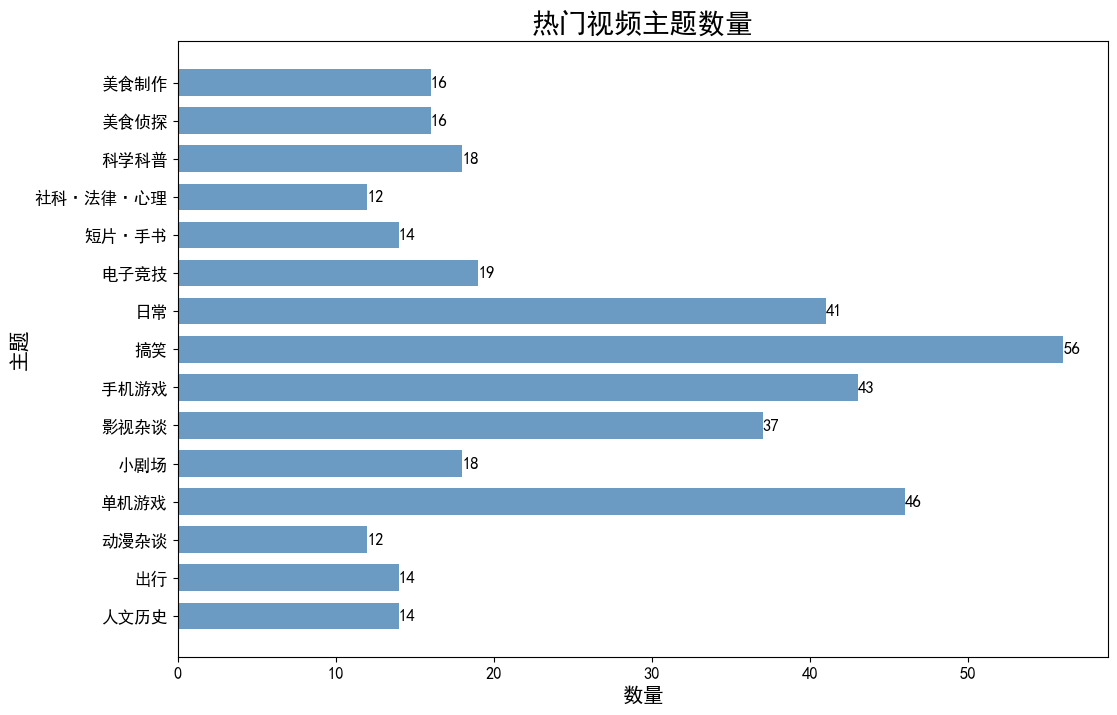

In [33]:
from pylab import mpl
# 设置中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False


plt.figure(figsize=(12, 8), dpi=100)
a = show_tname["tname"]
b = show_tname["数量"]

# Make a horizontal bar plot.
fig = plt.barh(y=a, width=b, height=0.7, color="steelblue", alpha=0.8)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("数量", size=15)
plt.ylabel("主题", size=15)
plt.title("热门视频主题数量", size=20)

# 添加数值
plt.bar_label(container=fig, size=12)

plt.show()


# 视频观看点赞比

In [41]:
df_all = pd.DataFrame(data={"tname": file_data["tname"].unique(),
                            "view": [0] * file_data["tname"].unique(),
                            "like": [0] * file_data["tname"].unique()})
df_all

,tname,view,like
0,美妆护肤,,
1,MAD·AMV,,
2,数码,,
3,日常,,
4,财经商业,,
...,...,...,...
72,手办·模玩,,
73,特摄,,
74,野生技能协会,,
75,运动文化,,


In [48]:
# 计算主题视频的总播放量和总点赞数
sum_view = file_data["view"].groupby(by=file_data["tname"]).sum()
sum_like = file_data["like"].groupby(by=file_data["tname"]).sum()

df_all["view"] = sum_view.values
df_all["like"] = sum_like.values
# 计算like/view，并保留两位小致
df_all["like/view"] = round(number=df_all["like"] / df_all["view"], ndigits=2)
df_all

,tname,view,like,like/view
0,美妆护肤,397991,64635,0.16
1,MAD·AMV,1605016,149959,0.09
2,数码,2026387,303295,0.15
3,日常,845274,51812,0.06
4,财经商业,3258203,267408,0.08
...,...,...,...,...
72,手办·模玩,325798,36257,0.11
73,特摄,7772176,396847,0.05
74,野生技能协会,1512272,53334,0.04
75,运动文化,2965524,222490,0.08


In [49]:
new_df.rename(columns={'like': '数量'}, inplace=True)

In [51]:
df_merge = pd.merge(left=new_df, right=df_all)
df_merge

,tname,数量,view,like,like/view
0,美妆护肤,2,397991,64635,0.16
1,MAD·AMV,5,1605016,149959,0.09
2,数码,4,2026387,303295,0.15
3,日常,2,845274,51812,0.06
4,财经商业,5,3258203,267408,0.08
...,...,...,...,...,...
72,手办·模玩,2,325798,36257,0.11
73,特摄,8,7772176,396847,0.05
74,野生技能协会,3,1512272,53334,0.04
75,运动文化,6,2965524,222490,0.08


In [60]:
top_10_data = df_merge.nlargest(10, '数量')
top_10_data

,tname,数量,view,like,like/view
28,明星综合,56,47476580,5150809,0.11
14,科学科普,46,20079382,1472584,0.07
27,美食测评,43,19934732,1625962,0.08
31,乐评盘点,41,35662904,3359170,0.09
24,社科·法律·心理,37,29074998,1505460,0.05
44,预告·资讯,19,11050670,636990,0.06
22,人力VOCALOID,18,16576710,1814882,0.11
48,国风舞蹈,18,17224334,1224115,0.07
55,计算机技术,16,10262810,956775,0.09
56,桌游棋牌,16,13929075,1574636,0.11


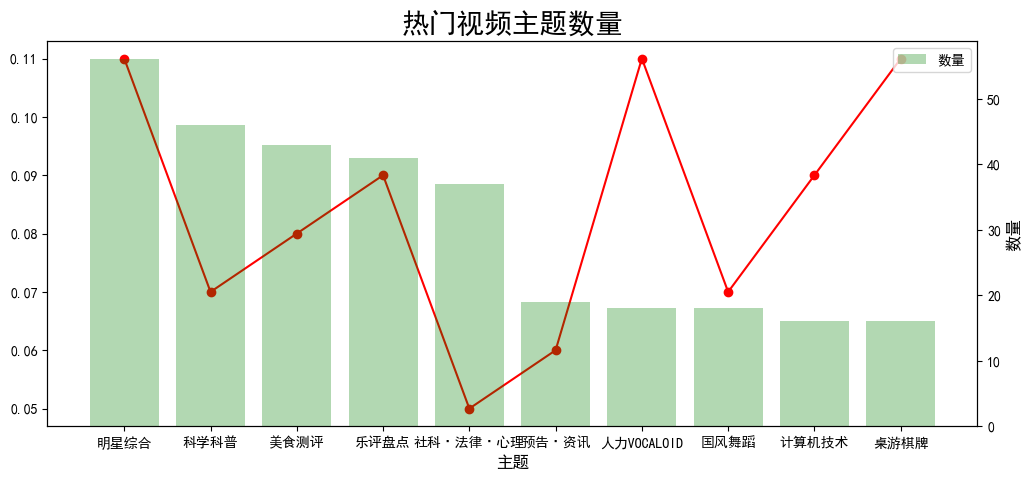

In [74]:
import matplotlib.pyplot as plt
from pylab import mpl
# 设置中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False


# 准备数据
num = top_10_data["数量"]
like_view = top_10_data["like/view"]
tname = top_10_data["tname"]

# 折线图
fig, axes = plt.subplots(1, 1, figsize=(12, 5), dpi=100)
axes.plot(tname, like_view, "or-", label="喜爱比")

# # 在折线图上显示数值
# for i in range(len(tname)):
#     print("like_view[i]:", like_view[i])  # 打印 like_view[i] 的值
#     axes.annotate(str(like_view[i]), xy=(tname[i], like_view[i]))
# axes.set_ylabel("like/view", size=12)
# axes.legend(loc="upper left")


# 条形图
twin_axes = axes.twinx()
"""
.twinx()方法用于创建一个新的坐标轴，它与原始坐标轴共享x轴。新的坐标轴将覆盖原始坐标轴，
并且其刻度将位于右侧。
这样就可以在同一张图上绘制两个具有不同y轴刻度的图形。
"""
twin_axes.bar(tname, num, alpha=0.3, color="green", label="数量")
twin_axes.set_ylabel("数量", size=12)
twin_axes.legend(loc="upper right")

plt.title("热门视频主题数量", size=20)
axes.set_xlabel("主题", size=12)
plt.show()